In [ ]:
# import pickle
# file_path = r"/home/sirbastiano/Documenti/Scripts/MMDETv2/mmdetection/checkpoints/DETR_r50_150e/saving_0.pkl"
# # load : get the data from file
# data = pickle.load(open(file_path, "rb"))
# # loads : get the data from var
# data
# # data = pickle.load(var)

## Loss

In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['science','nature','no-latex'])

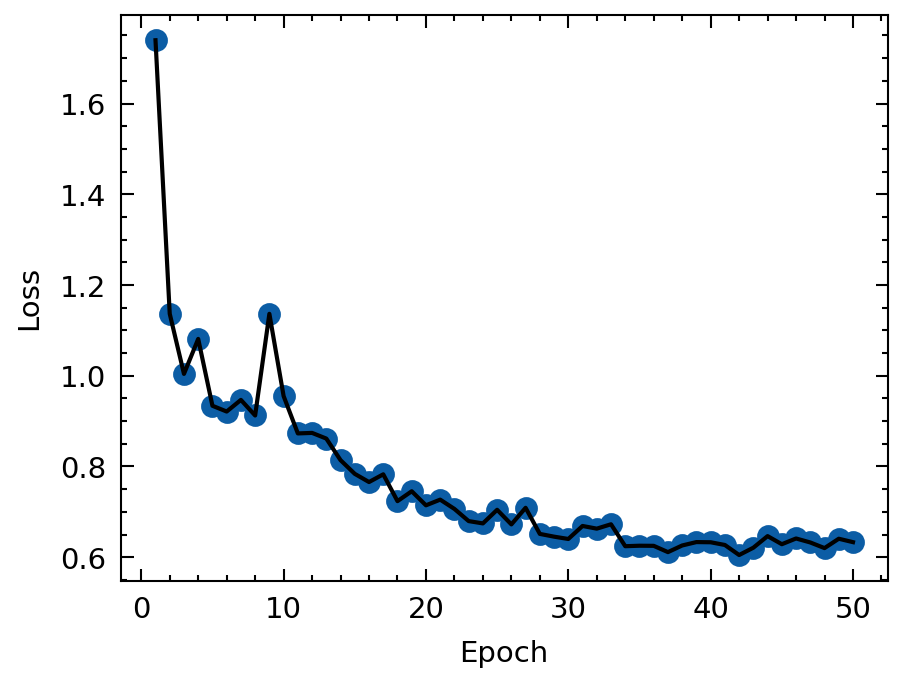

In [4]:
data = pd.read_json('checkpoints/B4/retina_swin/retina_swin_2022-07-28T22:15:36_768_50e_B4_lr_0.001_step/20220728_221540.log.json', encoding= 'unicode_escape', lines=True)
val=data[data['mode']=='val']
val=val.dropna(subset=['loss'])

fig, axs = plt.subplots(dpi=300)
x, y = val['epoch'], val['loss']
plt.plot(x,y,'k')
data[data['mode']=='val'].plot.scatter(x='epoch', y='loss', ax=axs)
plt.ylabel('Loss')
plt.xlabel('Epoch')
fig.savefig('Loss_retina_swin_iac22.png',dpi=300)
plt.show()

# mAP

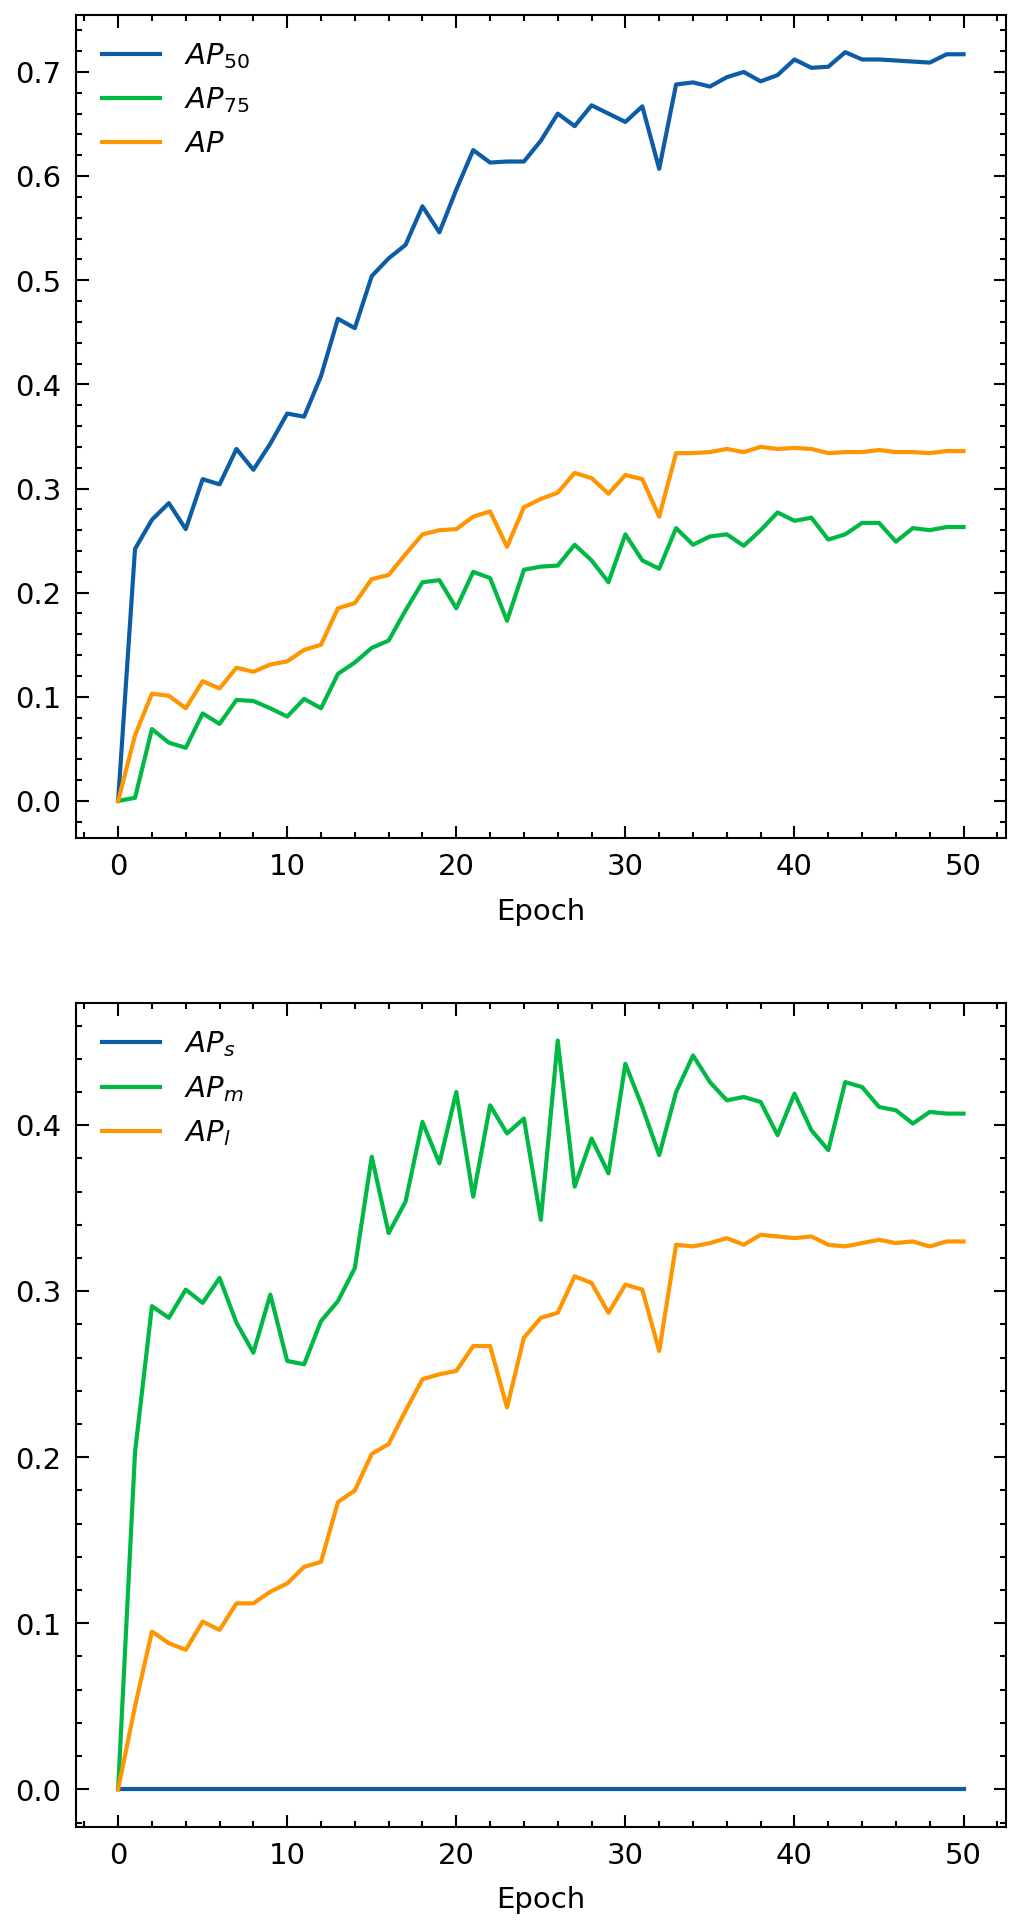

In [18]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use(['science','nature','no-latex'])
#### PUNTARE ALLA CARTELLA:
json_files = Path('checkpoints/B4/retina_swin/retina_swin_2022-07-28T22:15:36_768_50e_B4_lr_0.001_step').glob('**/*')
json_files = [x for x in json_files if x.suffix == '.json']
json_files = [x for x in json_files if x.name.startswith('e')]
json_files.sort()
Metrics = {'AP_50':[],'AP_75':[], 'AP':[],'APs':[],'APm':[],'APl':[],}
for idx in range(len(json_files)):
     df = pd.read_json(json_files[idx], encoding= 'unicode_escape', lines=True)
     metric = df['metric']
     metrics = metric.to_list()[0]
     
     if metric[0] != {}:
          AP50 = metrics['bbox_mAP_50']
          AP75 = metrics['bbox_mAP_75']
          AP = metrics['bbox_mAP']
          
          APs = metrics['bbox_mAP_s']
          APm = metrics['bbox_mAP_m']
          APl = metrics['bbox_mAP_l']


          Metrics['AP'].append(AP)
          Metrics['AP_50'].append(AP50)
          Metrics['AP_75'].append(AP75)
          Metrics['APs'].append(APs)
          Metrics['APm'].append(APm)
          Metrics['APl'].append(APl)



     else:
          Metrics['AP'].append(0)
          Metrics['AP_50'].append(0)
          Metrics['AP_75'].append(0)
          Metrics['APs'].append(0)
          Metrics['APm'].append(0)
          Metrics['APl'].append(0)


fig, ax = plt.subplots(2, dpi=300, figsize=(4,8))
ax[0].plot(Metrics['AP_50'], label='$AP_{50}$')
ax[0].plot(Metrics['AP_75'], label='$AP_{75}$')
ax[0].plot(Metrics['AP'], label='$AP$')
ax[0].legend(loc='upper left',)
ax[0].set_xlabel('Epoch')

ax[1].plot([x if x != -1 else 0 for x in Metrics['APs']], label='$AP_{s}$')
ax[1].plot([x if x != -1 else 0 for x in Metrics['APm']], label='$AP_{m}$')
ax[1].plot([x if x != -1 else 0 for x in Metrics['APl']], label='$AP_{l}$')
ax[1].legend(loc='upper left',)
ax[1].set_xlabel('Epoch')
fig.savefig('mAP_retina_swin_iac22.png')
plt.show()

In [ ]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['science','nature','no-latex'])

json_files = Path('/home/sirbastiano/Documenti/Scripts/MMDETv2/mmdetection/checkpoints/hrnet402022-07-05T05:17:07_1300_B4').glob('**/*')
json_files = [x for x in json_files if x.suffix == '.json']
json_files = [x for x in json_files if x.name.startswith('e')]
json_files.sort()
Metrics = {'AP_50':[]}
for idx in range(len(json_files)):
     df = pd.read_json(json_files[idx], encoding= 'unicode_escape', lines=True)
     metric = df['metric']
     metrics = metric.to_list()[0]
     AP50 = metrics['bbox_mAP_50']
     Metrics['AP_50'].append(AP50)
plt.figure(dpi=300)
plt.plot(Metrics['AP_50'])
plt.xlabel('Epoch')
plt.ylabel('$mAP_{50}$')
plt.title(max(Metrics['AP_50']))
# plt.savefig('Images/mask_rcnn_r101_20e_lr_0.001_B3.png')
plt.show()

# TABLE

In [1]:
from pathlib import Path
def retrieve_AP(directory: Path):
     sub_dirs_json = [x  for x in directory.glob('**/*') if (x.suffix == '.json' and x.name.startswith('e'))]
     Metrics = {'AP_50':[],'AP_75':[],'AP':[],'APs':[],'APm':[],'APl':[],}
     for json in sub_dirs_json:
          # print(json.name)
          try:
               df = pd.read_json(json, encoding= 'unicode_escape', lines=True)
               metric = df['metric']
               metrics = metric.to_list()[0]
               AP50 = metrics['bbox_mAP_50']
               AP75 = metrics['bbox_mAP_75']
               AP = metrics['bbox_mAP']
               APs = metrics['bbox_mAP_s']
               APm = metrics['bbox_mAP_m']
               APl = metrics['bbox_mAP_l']
          
               Metrics['AP_50'].append(AP50)
               Metrics['AP_75'].append(AP75)
               Metrics['AP'].append(AP)
               Metrics['APs'].append(APs)
               Metrics['AP'].append(APm)
               Metrics['AP'].append(APl)
          except:
               pass
               # print('SKIPPING:',json.name)
          # MAP50, MAP75, MAP, MAPs, MAPm, MAPl = max(Metrics['AP_50']),max(Metrics['AP_75']),max(Metrics['AP']),max(Metrics['APs']),max(Metrics['APm']),max(Metrics['APl']),

     Metrics = pd.DataFrame.from_dict(Metrics, orient='index').transpose() #A
     return Metrics

In [4]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['science','nature','no-latex'])

SORT_BY = 'AP_50'

DATASET = 'SARWake'

directories = [x for x in Path(f'checkpoints/{DATASET}').glob('*') if x.is_dir()]
idx = 0 
TMP = []
for fold in directories:
     try:
          Metrics = retrieve_AP(fold)
          df = Metrics.sort_values(by=SORT_BY, ascending=False).iloc[0:1]
          assert isinstance(df.index.item(), int)
          print(f'Parsed:{fold.name}')
          tmp = df.rename(index={df.index.item(): fold.name})
          TMP.append(tmp)
     except:
          print(f'***************************** Check folder:{fold.name}  *****************************')
     
     idx +=1
res = pd.concat(x for x in TMP)
res.sort_values(by=SORT_BY, ascending=False)

Parsed:retina101
Parsed:efficientdet
Parsed:fovea101
Parsed:mask50
Parsed:fovea50
Parsed:htc50
Parsed:htc101
Parsed:retina_swin
Parsed:fcos50
Parsed:retina18
Parsed:vfnet
Parsed:tridentnet50
***************************** Check folder:hrnet40_cascade  *****************************
Parsed:centernet18
Parsed:retina50
***************************** Check folder:centripetalnet  *****************************


,AP_50,AP_75,AP,APs,APm,APl
fovea101,0.966,0.373,0.035,-1.0,NaN,NaN
vfnet,0.966,0.476,0.026,-1.0,NaN,NaN
retina101,0.964,0.571,0.036,-1.0,NaN,NaN
htc50,0.959,0.415,-1.000,-1.0,NaN,NaN
htc101,0.955,0.569,0.421,-1.0,NaN,NaN
fovea50,0.928,0.377,-1.000,-1.0,NaN,NaN
mask50,0.915,0.444,-1.000,-1.0,NaN,NaN
retina18,0.868,0.379,0.046,-1.0,NaN,NaN
retina50,0.797,0.252,-1.000,-1.0,NaN,NaN
retina_swin,0.744,0.285,0.268,-1.0,NaN,NaN


In [3]:
# res.to_excel('Risultati_multi_wake.xlsx')
res.to_excel('Risultati_crateri.xlsx')